<a href="https://colab.research.google.com/github/benasphy/k-means/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

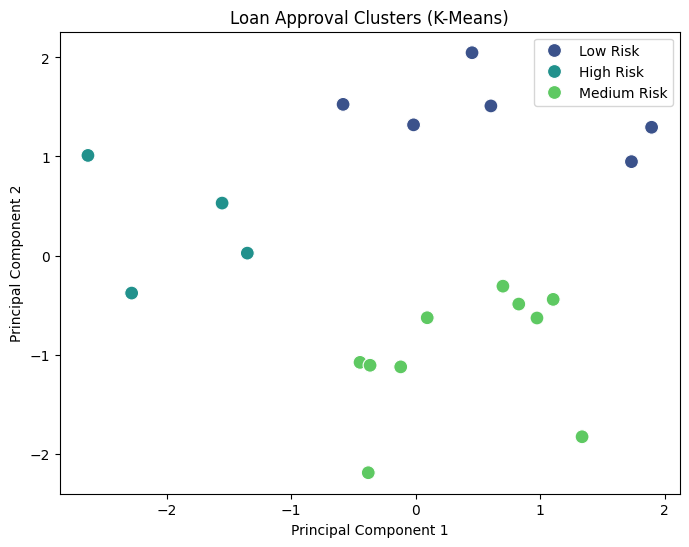

    Applicant_ID  Annual_Income  Credit_Score  Loan_Amount Risk_Category
0              1          78326           815        45835      Low Risk
1              2          98857           504         7798     High Risk
2              3          73325           412        47881   Medium Risk
3              4          90501           311        30489   Medium Risk
4              5          92579           368        41836   Medium Risk
5              6          71856           344        20114   Medium Risk
6              7          43549           679        24974     High Risk
7              8         110525           675        36008      Low Risk
8              9          66279           321        31423   Medium Risk
9             10          35312           333        22606   Medium Risk
10            11          56912           381        35517   Medium Risk
11            12         114579           779        31692      Low Risk
12            13          74835           474      

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Simulated dataset for loan applicants
data = {
    'Applicant_ID': range(1, 21),
    'Annual_Income': np.random.randint(30000, 120000, 20),
    'Credit_Score': np.random.randint(300, 850, 20),
    'Loan_Amount': np.random.randint(5000, 50000, 20),
    'Debt_to_Income_Ratio': np.random.uniform(0.1, 0.5, 20)
}

df = pd.DataFrame(data)

# Selecting relevant features
X = df[['Annual_Income', 'Credit_Score', 'Loan_Amount', 'Debt_to_Income_Ratio']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Risk_Category'] = kmeans.fit_predict(X_scaled)

# Label clusters as Low, Medium, or High risk based on Credit Score & Income
risk_labels = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
df['Risk_Category'] = df['Risk_Category'].map(risk_labels)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Risk_Category'], palette='viridis', s=100)
plt.title('Loan Approval Clusters (K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display final clustered dataset
print(df[['Applicant_ID', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Risk_Category']])
